In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv("C:/Users/ROG/Desktop/machine learning/Student_Performance.csv").head(100)
print("\nShape of dataset:", data.shape)
print()
data.head()


Shape of dataset: (100, 10)



,Unnamed: 0,Stu_ID,Atten_Percent,Assig_Sc,Mid_Sc,Final_Sc,Proj_Sc,Parti_Sc,Overall_Sc,Status
0,0,STU202400001,85.93,60.76,70.91,70.90,72.88,72.84,68.86,Pass
1,1,STU202400002,83.58,51.84,75.81,71.52,78.06,80.04,69.29,Pass
2,2,STU202400003,81.84,41.83,38.96,52.38,61.85,71.51,50.39,Pass
3,3,STU202400004,72.28,81.50,83.56,80.49,66.04,76.75,78.81,Pass
4,4,STU202400005,97.48,64.11,84.47,62.98,75.97,88.76,72.09,Pass


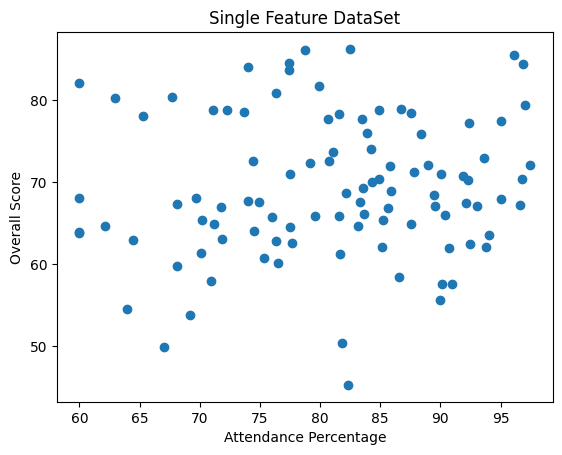

In [6]:
X=data.iloc[:,2]
Y=data.iloc[:,-2]
fig, plot_data_set = plt.subplots()
plot_data_set.set_title("Single Feature DataSet")
plot_data_set.set_xlabel("Attendance Percentage")
plot_data_set.set_ylabel("Overall Score")
plot_data_set.scatter(X,Y,label="Data Points")
plt.show()



In [7]:

missing_count = {}

for col in data.columns:
    count = 0
    for value in data[col]:
        if value != value:   # NaN check (because NaN != NaN)
            count += 1
        elif value is None:  # None check
            count += 1
        elif value == "":    # Empty string check
            count += 1
    missing_count[col] = count

print(missing_count)


{'Unnamed: 0': 0, 'Stu_ID': 0, 'Atten_Percent': 0, 'Assig_Sc': 0, 'Mid_Sc': 0, 'Final_Sc': 0, 'Proj_Sc': 0, 'Parti_Sc': 0, 'Overall_Sc': 0, 'Status': 0}


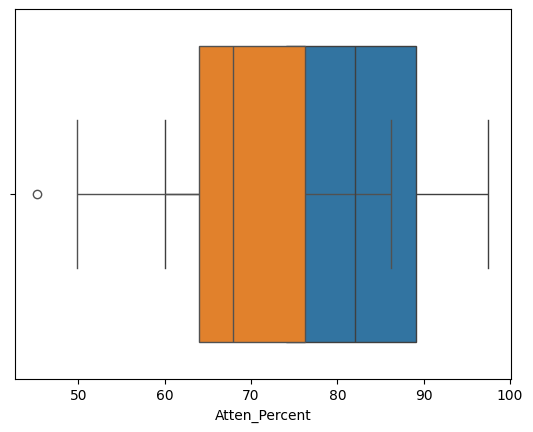

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['Atten_Percent'])      #Atten_Percent--blue
sns.boxplot(x=data['Overall_Sc'])         #Overall_Sc--orange
plt.show()

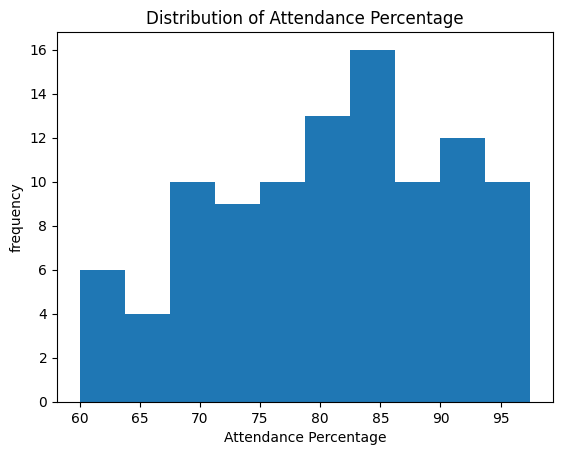

In [18]:
#histogram for Plot Feature Distribution
import matplotlib.pyplot as plt                                  
                                                                
                                                               # Feature distribution plots help in understanding the spread and pattern of data values for each feature.
                                                               #Correlation heatmap visualizes the relationship between variables and helps identify strongly related features
                                                                #with the target variable.
                                                                

plt.hist(data["Atten_Percent"], bins=10)
plt.xlabel("Attendance Percentage")
plt.ylabel("frequency")
plt.title("Distribution of Attendance Percentage")
plt.show()

In [24]:
# simple linear regration model
m = 0
c = 0

alpha = 0.000001  # The learning Rate
epochs = 450  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

history = [] # To store (m, c) at each epoch to animate the gif

cost_history = []

# Performing Gradient Descent
for i in range(epochs):
    Y_pred = m*X + c  # The current predicted value of Y

    #calculate the cost 
    cost = (1/n)*sum((Y-Y_pred)**2)
    cost_history.append(cost)

    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c

    m = m - alpha * D_m  # Update m
    c = c - alpha * D_c  # Update c

    # Store the current state
    history.append((m, c))

final_m, final_c = m, c
print(f"Final Weights: m={m}, c={c}")

Final Weights: m=0.8416857187774708, c=0.011071229360255518


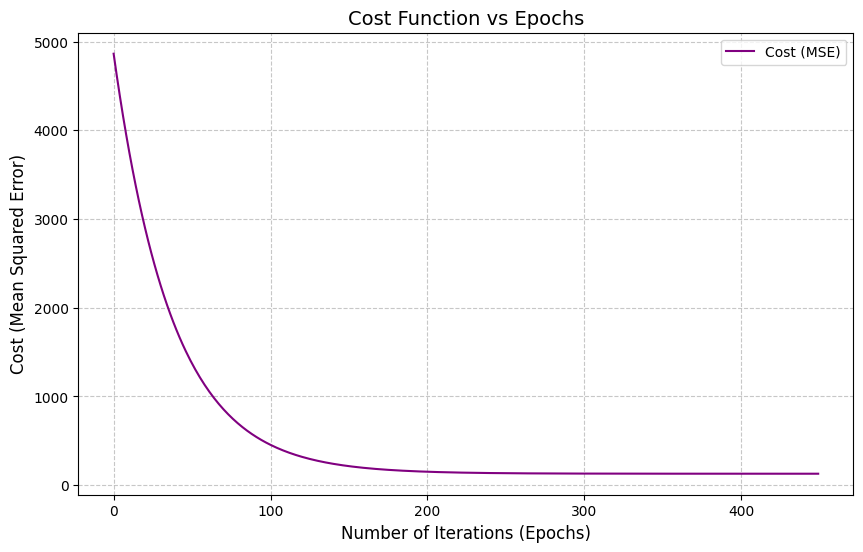

Initial Cost: 4863.796728
Final Cost: 128.8566671768093


In [25]:
# 4. Plotting the Cost Function
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), cost_history, color='purple', label='Cost (MSE)')

# Adding labels and titles
plt.title("Cost Function vs Epochs", fontsize=14)
plt.xlabel("Number of Iterations (Epochs)", fontsize=12)
plt.ylabel("Cost (Mean Squared Error)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()



# Show the plot
plt.show()

print(f"Initial Cost: {cost_history[0]}")
print(f"Final Cost: {cost_history[-1]}")

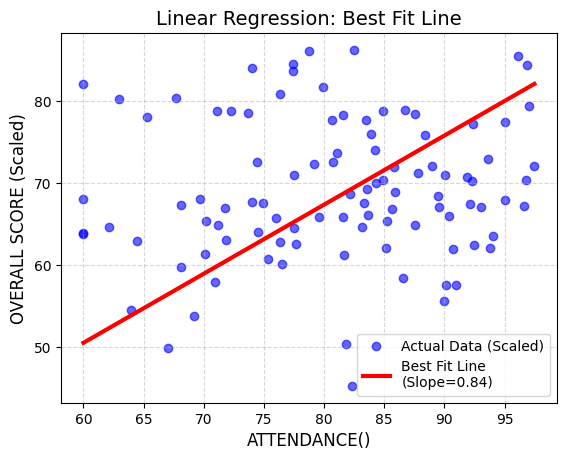

In [26]:
                                                                                                    # Plot the Scatter Points (The Blue Dots)
plt.scatter(X, Y, color='blue', alpha=0.6, label='Actual Data (Scaled)')

                                                                                                    # Draw the Best Fit Line (The Red Line)
x_line = np.linspace(X.min(), X.max(), 100) # Create a range of X values
y_line = c + m * x_line                    # The Equation: y = c + mx

plt.plot(x_line, y_line, color='red', linewidth=3, label=f'Best Fit Line\n(Slope={m:.2f})')

                                                                                                     # Add Labels and Titles
plt.title("Linear Regression: Best Fit Line", fontsize=14)
plt.xlabel("ATTENDANCE()", fontsize=12)
plt.ylabel("OVERALL SCORE (Scaled)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

                                                                                                       #  Show the Plot
plt.show()